In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from datetime import datetime

In [27]:
df=pd.read_csv("covdata.csv")

In [62]:
df_copy=df.copy()
df_copy.head()

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,data_quality_grade,death,hospitalized,total_test_results
0,2020-07-24,AK,2748.0,197824.0,37.0,NaN,NaN,NaN,1.0,NaN,A,19.0,NaN,200572
1,2020-07-24,AL,76005.0,552979.0,1570.0,9157.0,NaN,1058.0,NaN,565.0,B,1438.0,9157.0,628984
2,2020-07-24,AR,37249.0,424215.0,497.0,2361.0,NaN,NaN,109.0,329.0,A+,394.0,2361.0,461464
3,2020-07-24,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,C,0.0,NaN,1037
4,2020-07-24,AZ,156301.0,680516.0,2844.0,7461.0,837.0,NaN,575.0,NaN,A+,3142.0,7461.0,836817


In [63]:
XD=df_copy.groupby("date",as_index=False).sum()
XD.head()

,date,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,death,hospitalized,total_test_results
0,2020-01-22,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2020-01-23,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2020-01-24,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2020-01-25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2020-01-26,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [64]:
df_copy.columns

Index(['date', 'state', 'positive', 'negative', 'hospitalized_currently',
       'hospitalized_cumulative', 'in_icu_currently', 'in_icu_cumulative',
       'on_ventilator_currently', 'on_ventilator_cumulative',
       'data_quality_grade', 'death', 'hospitalized', 'total_test_results'],
      dtype='object')

In [55]:
df_copy.isnull().sum()

date                           0
state                          0
positive                      15
negative                     176
hospitalized_currently      2814
hospitalized_cumulative     4047
in_icu_currently            5558
in_icu_cumulative           7232
on_ventilator_currently     5889
on_ventilator_cumulative    8081
data_quality_grade          1175
death                        767
hospitalized                4047
total_test_results             0
dtype: int64

In [65]:
df_copy["positive"]=df_copy["positive"].interpolate()
df_copy["death"]=df_copy["death"].interpolate()
df_copy["negative"]=df_copy["negative"].interpolate()

In [33]:
# df_copy.drop(['fips_code', 'iso_subdivision','last_update_et', 'death_increase','recovered','hash','total', 'date_checked','pending','pos_neg', 'fips', 'death_increase','load_time','hospitalized_increase', 'negative_increase', 'positive_increase','iso_country','total_test_results_increase'],axis=1,inplace=True)

In [34]:
# Mysubmission = df_copy
# Mysubmission.to_csv('covdata.csv', index=False)

In [66]:
XDst=df_copy.groupby("state",as_index=False).count()

In [70]:
df_copy.sort_values("date",inplace=True)
df_copy.tail()

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,data_quality_grade,death,hospitalized,total_test_results
34,2020-07-24,NE,154.330814,474.611420,11.224972,39.344631,NaN,NaN,NaN,NaN,A,17.776389,39.344631,499.073141
33,2020-07-24,ND,74.926631,370.262069,6.082763,18.027756,NaN,NaN,NaN,NaN,C,9.380832,18.027756,377.767124
32,2020-07-24,NC,330.143908,1200.542377,34.380227,NaN,19.052559,NaN,NaN,NaN,A+,41.785165,NaN,1245.109232
30,2020-07-24,MS,222.851969,601.512261,34.871192,62.633857,16.703293,NaN,12.767145,NaN,A+,38.249183,62.633857,641.467069
0,2020-07-24,AK,52.421370,444.774100,6.082763,NaN,NaN,NaN,1.000000,NaN,A,4.358899,NaN,447.852654


In [58]:
df_copy.sort_values("state")
x=df_copy["state"].unique()
x

array(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL',
       'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE',
       'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

WA :


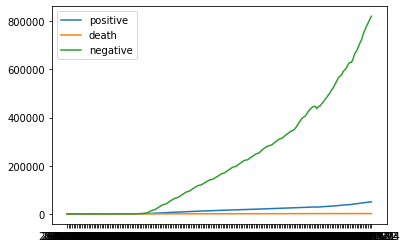

RI :


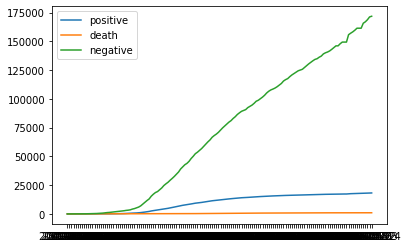

MI :


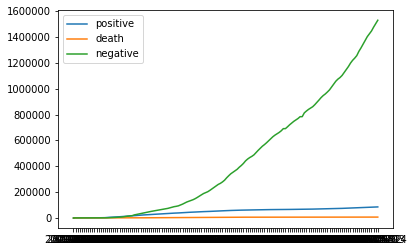

OR :


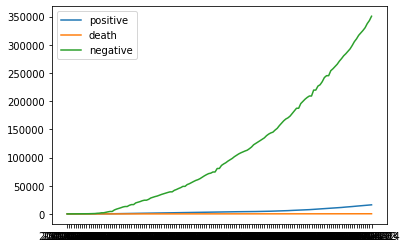

NH :


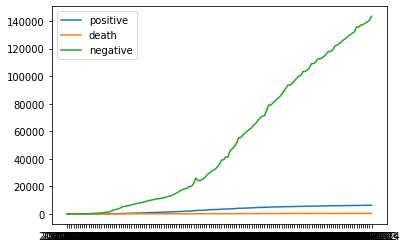

WI :


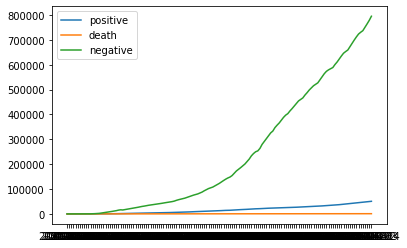

TX :


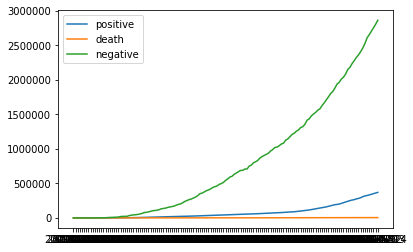

SC :


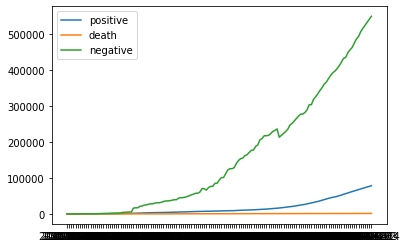

NY :


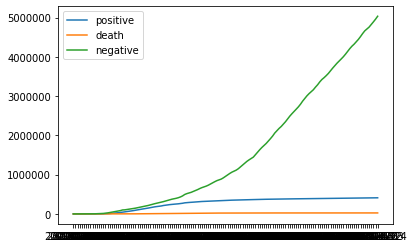

NC :


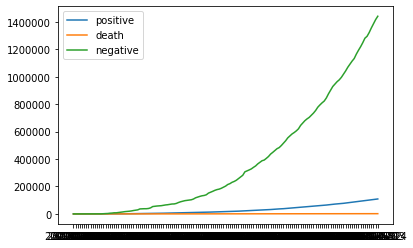

IL :


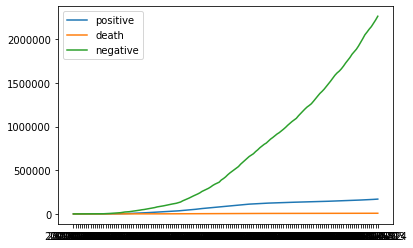

GA :


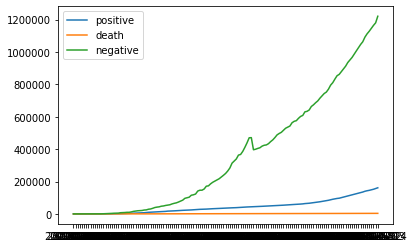

FL :


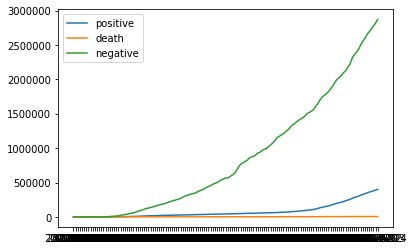

CA :


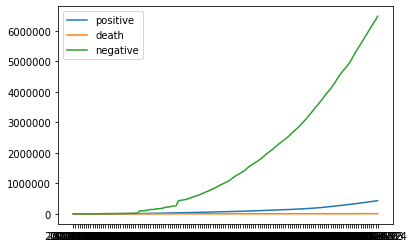

AZ :


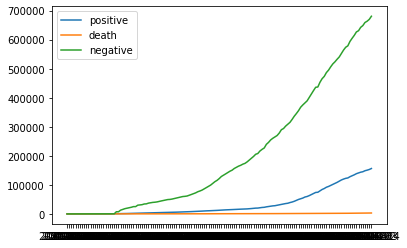

VA :


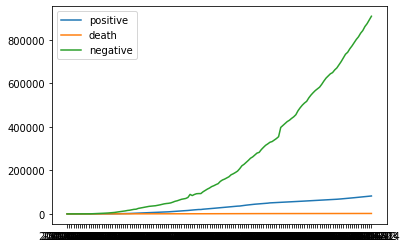

TN :


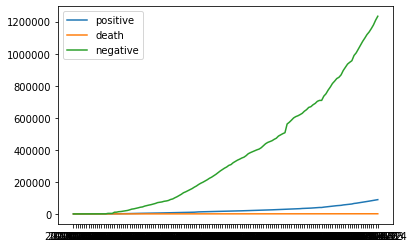

OH :


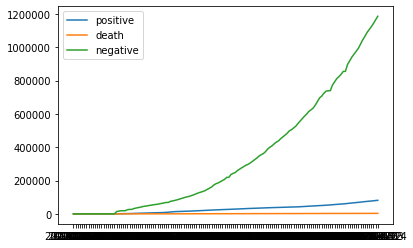

NV :


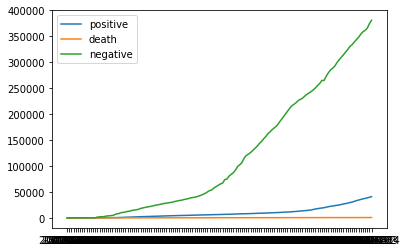

NJ :


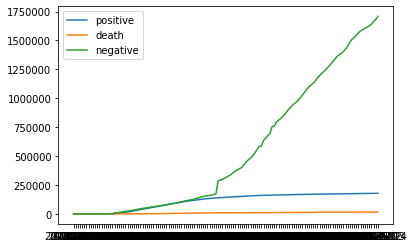

NE :


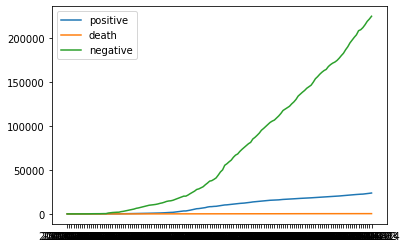

MD :


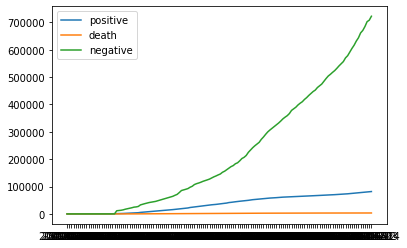

CO :


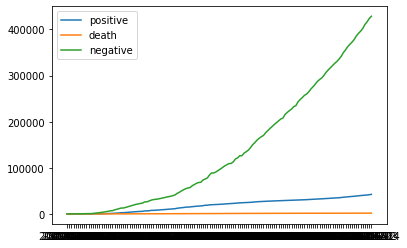

DC :


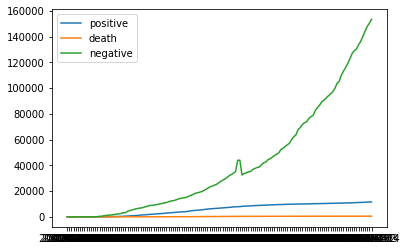

VT :


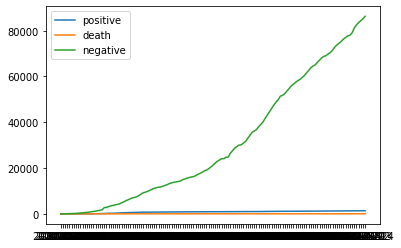

PA :


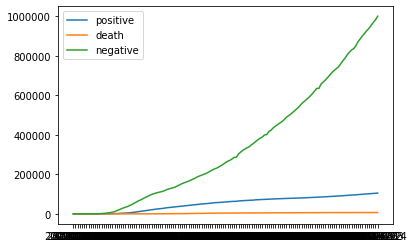

WV :


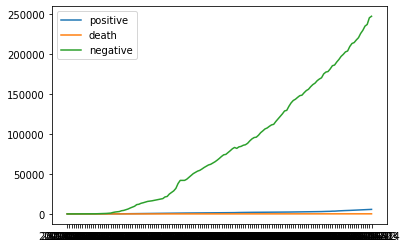

NM :


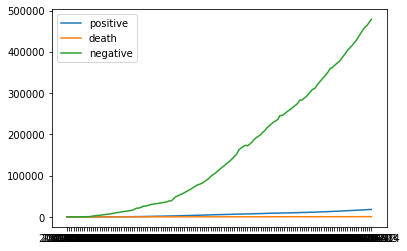

KS :


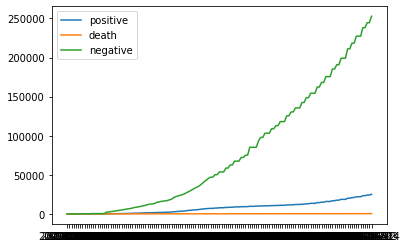

IA :


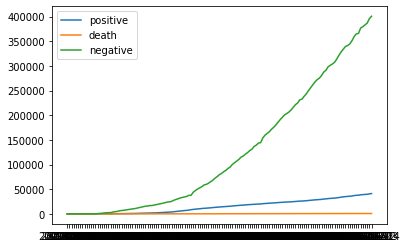

KY :


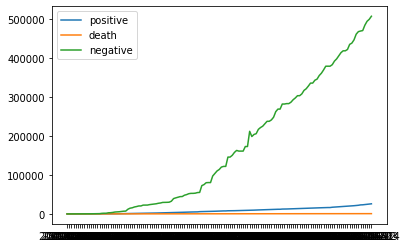

IN :


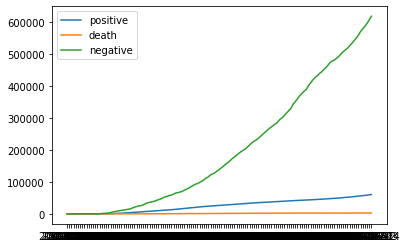

MN :


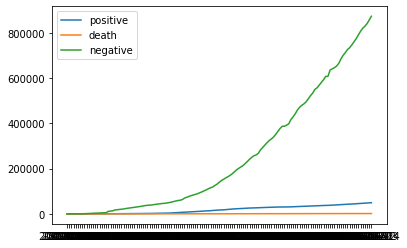

AR :


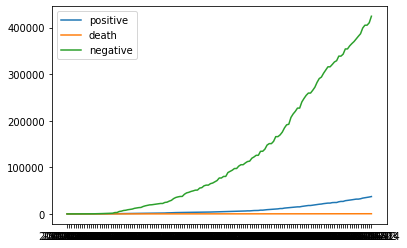

AK :


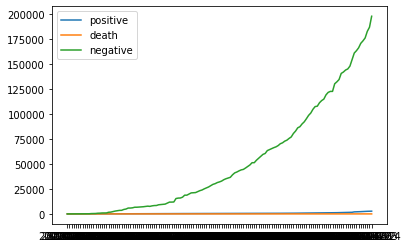

DE :


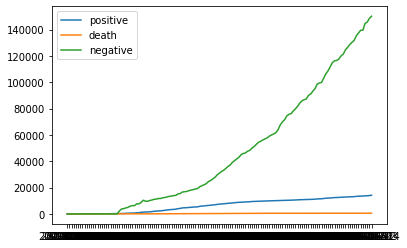

SD :


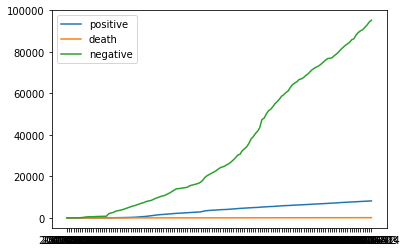

UT :


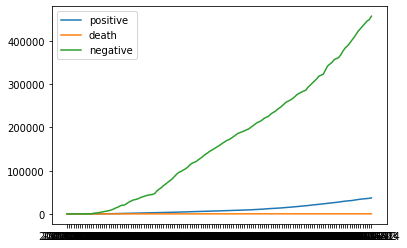

WY :


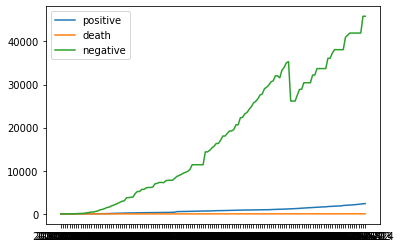

MS :


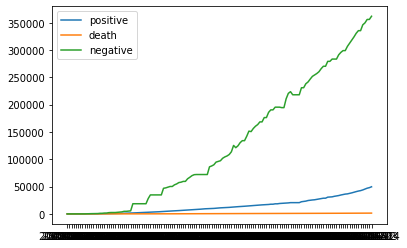

ND :


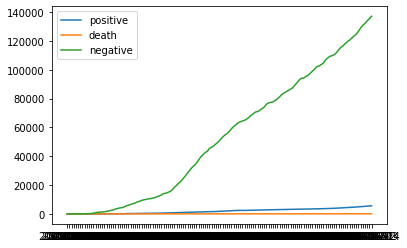

OK :


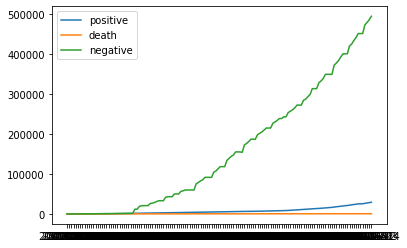

MT :


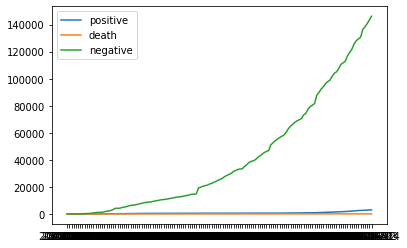

ID :


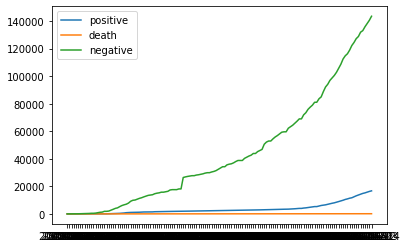

MO :


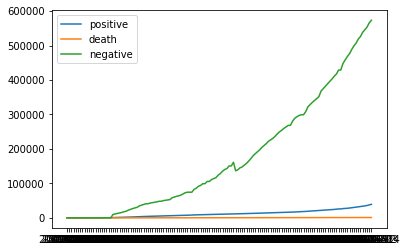

ME :


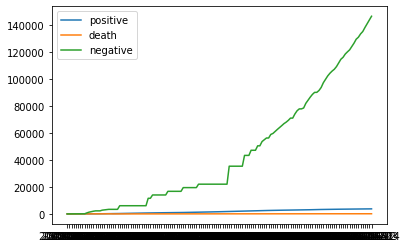

LA :


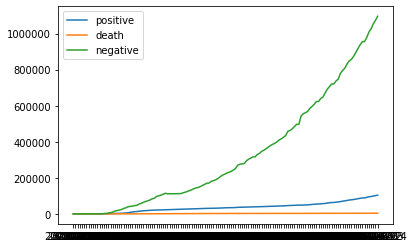

HI :


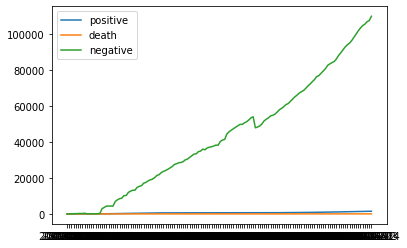

CT :


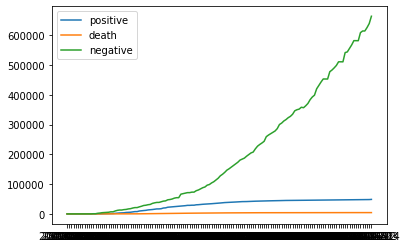

AL :


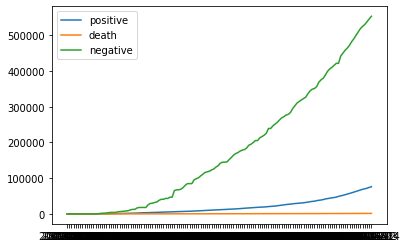

MA :


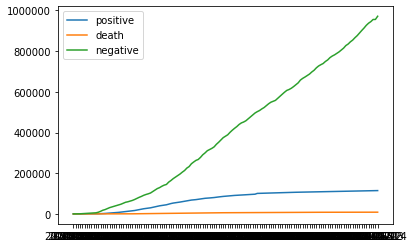

MP :


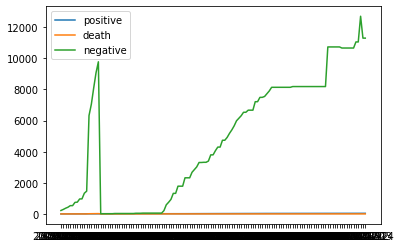

VI :


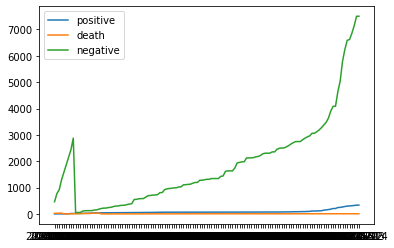

PR :


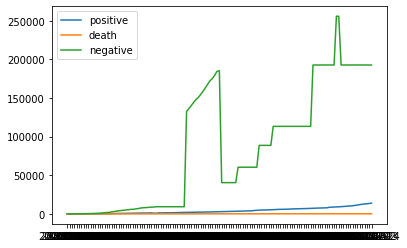

GU :


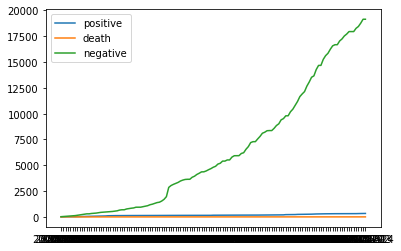

AS :


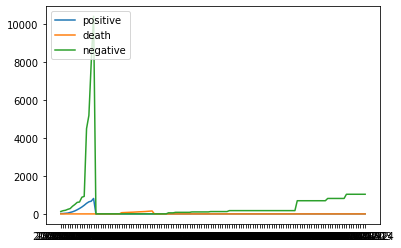

In [13]:
i=1
for d in x:
    dfd=df_copy[df_copy["state"]==d]
    print(d,":")
#     plt.subplot(14,4,i)
    plt.plot(dfd["date"],dfd["positive"])
    plt.plot(dfd["date"],dfd["death"])
    plt.plot(dfd["date"],dfd["negative"])
    plt.legend(["positive", "death","negative"], loc ="upper left")
    plt.show()

In [40]:
columnData=df_copy.columns.drop(['date','state','data_quality_grade'])

In [71]:
for u in columnData:
    df_copy[u]=np.sqrt(df_copy[u])
df_copy.tail()

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,data_quality_grade,death,hospitalized,total_test_results
34,2020-07-24,NE,12.422995,21.785578,3.350369,6.272530,NaN,NaN,NaN,NaN,A,4.216206,6.272530,22.339945
33,2020-07-24,ND,8.656017,19.242195,2.466326,4.245911,NaN,NaN,NaN,NaN,C,3.062814,4.245911,19.436232
32,2020-07-24,NC,18.169863,34.648844,5.863465,NaN,4.364924,NaN,NaN,NaN,A+,6.464145,NaN,35.286105
30,2020-07-24,MS,14.928227,24.525747,5.905183,7.914155,4.086966,NaN,3.573114,NaN,A+,6.184592,7.914155,25.327200
0,2020-07-24,AK,7.240260,21.089668,2.466326,NaN,NaN,NaN,1.000000,NaN,A,2.087798,NaN,21.162529


In [43]:
df_copy.head()

,date,state,positive,negative,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,on_ventilator_currently,on_ventilator_cumulative,...,negative1,hospitalized_currently1,hospitalized_cumulative1,in_icu_currently1,in_icu_cumulative1,on_ventilator_currently1,on_ventilator_cumulative1,death1,hospitalized1,total_test_results1
8482,2020-01-22,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.414214,NaN,1.414214
8481,2020-01-23,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.414214,NaN,1.414214
8480,2020-01-24,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.414214,NaN,1.414214
8479,2020-01-25,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.414214,NaN,1.414214
8478,2020-01-26,WA,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.414214,NaN,1.414214


AK :


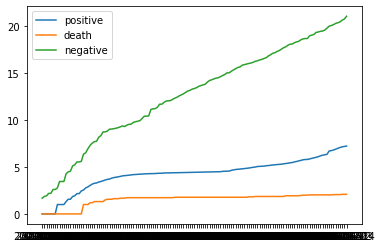

AL :


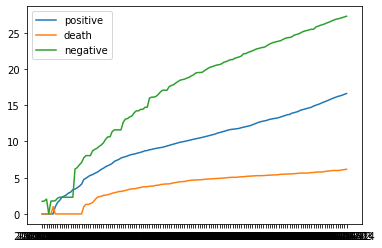

AR :


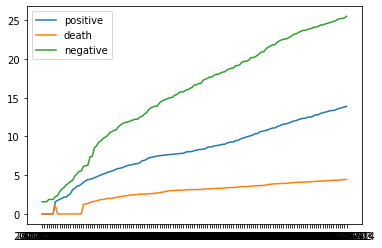

AS :


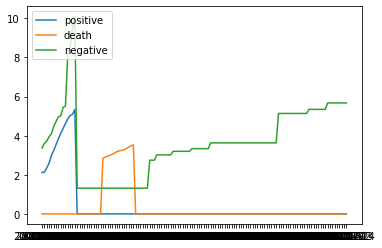

AZ :


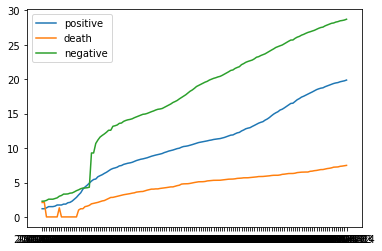

CA :


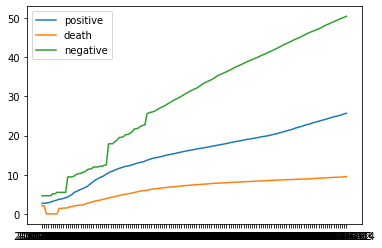

CO :


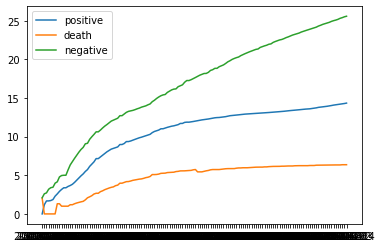

CT :


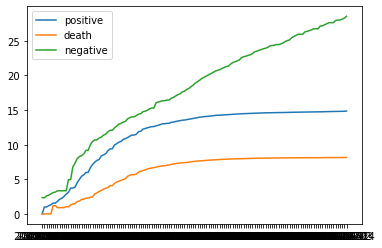

DC :


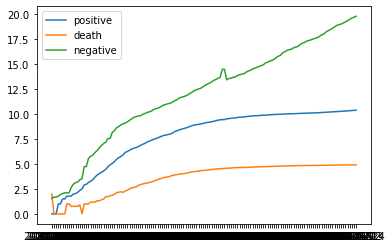

DE :


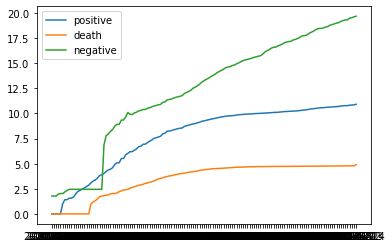

FL :


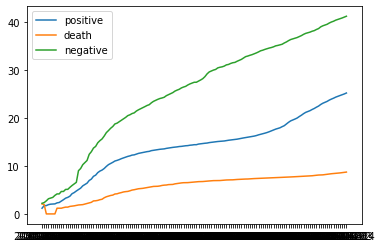

GA :


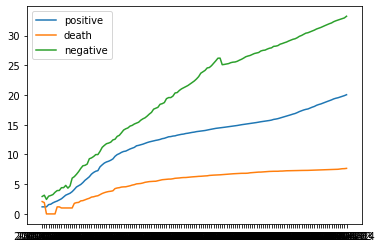

GU :


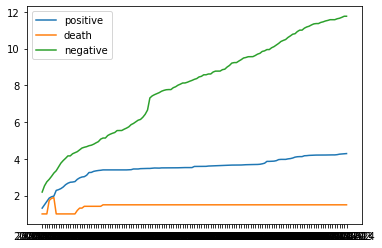

HI :


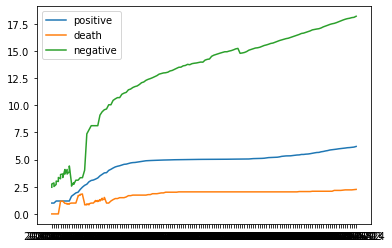

IA :


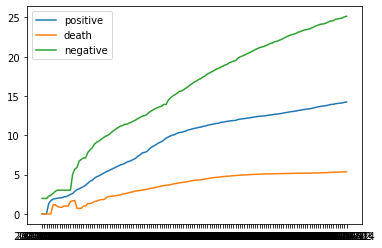

ID :


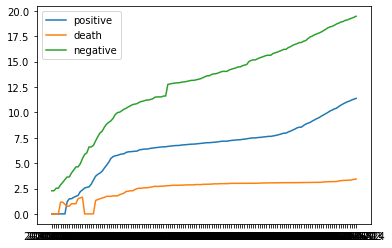

IL :


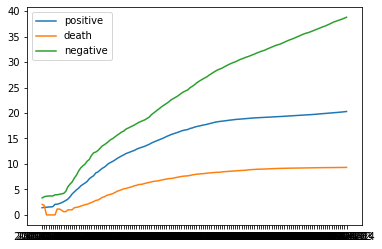

IN :


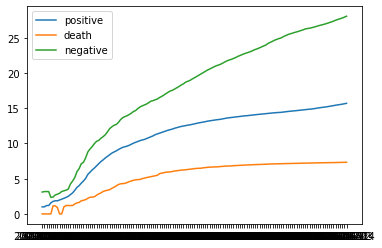

KS :


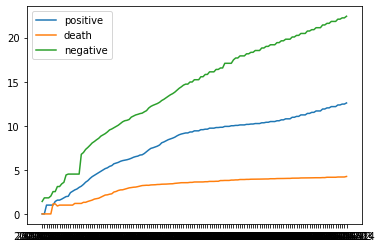

KY :


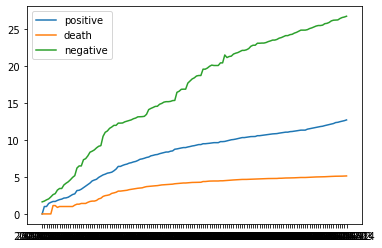

LA :


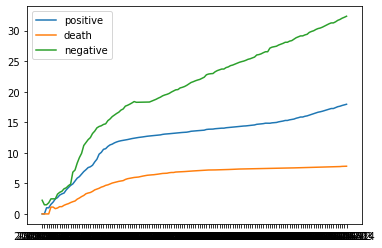

MA :


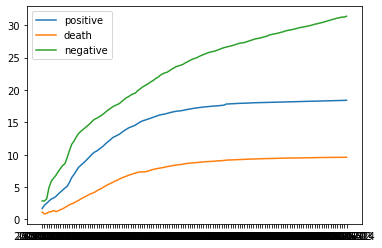

MD :


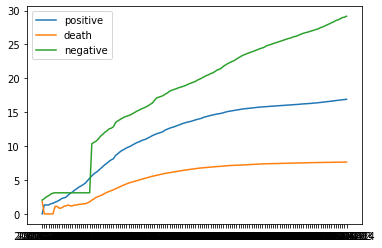

ME :


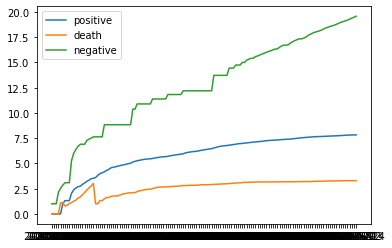

MI :


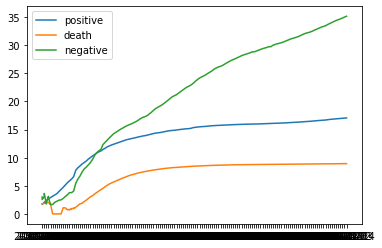

MN :


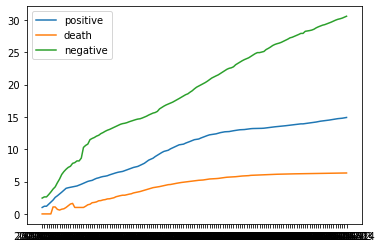

MO :


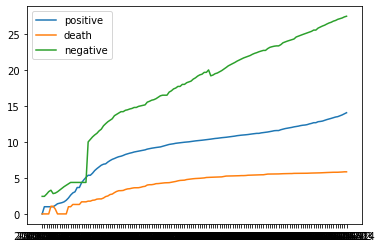

MP :


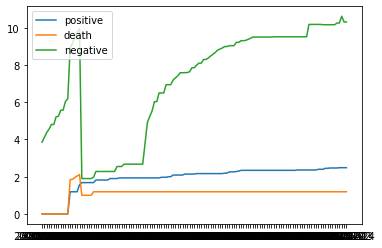

MS :


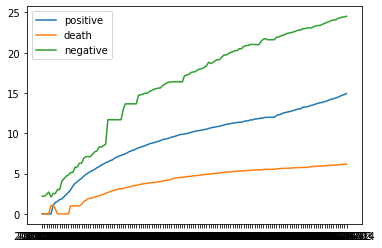

MT :


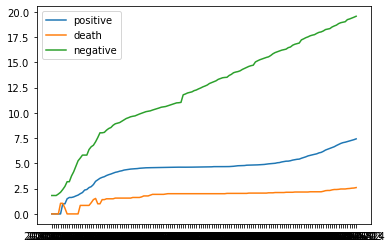

NC :


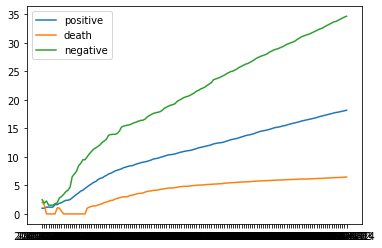

ND :


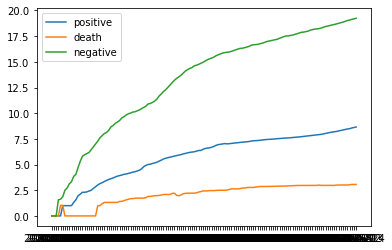

NE :


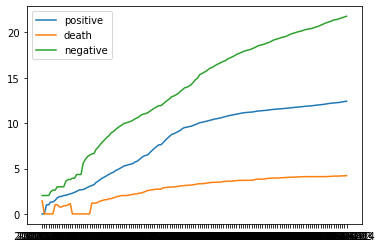

NH :


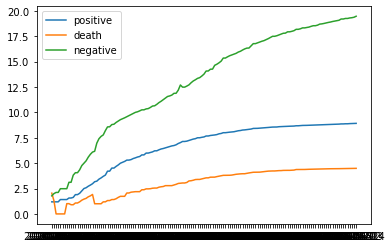

NJ :


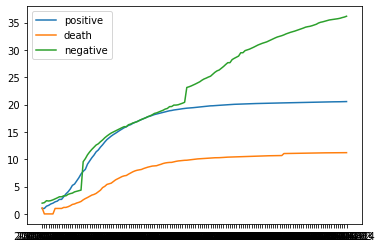

NM :


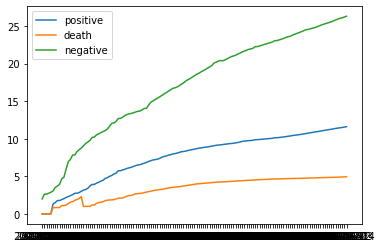

NV :


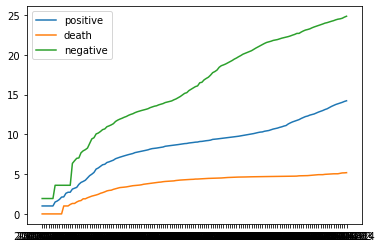

NY :


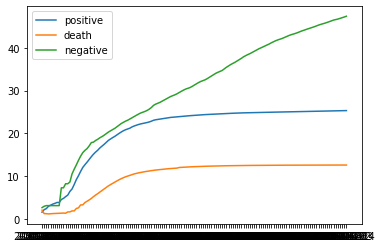

OH :


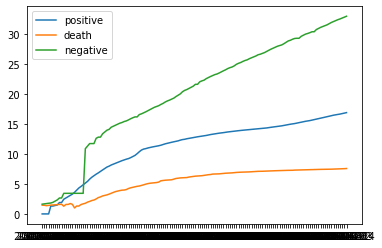

OK :


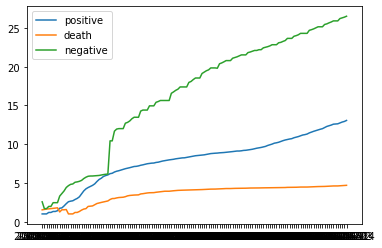

OR :


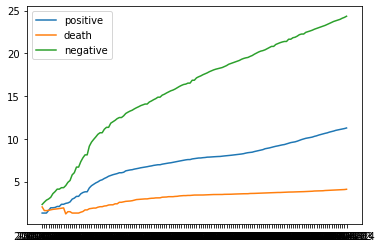

PA :


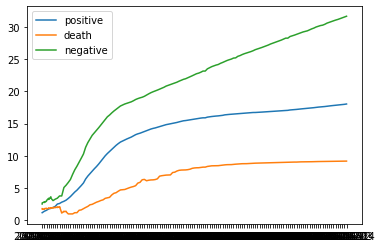

PR :


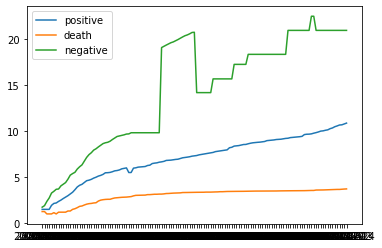

RI :


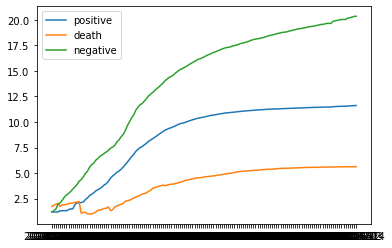

SC :


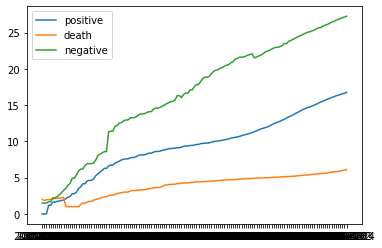

SD :


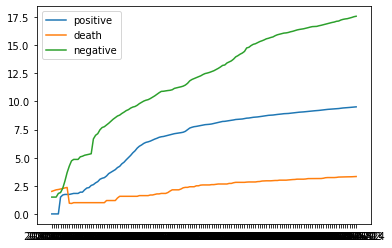

TN :


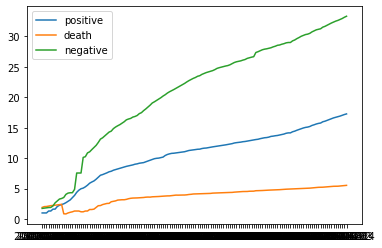

TX :


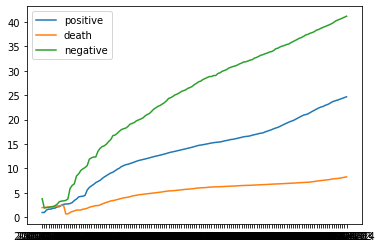

UT :


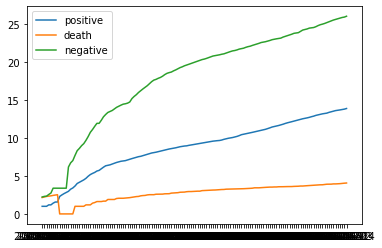

VA :


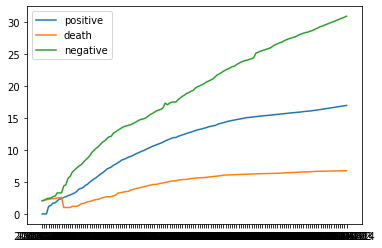

VI :


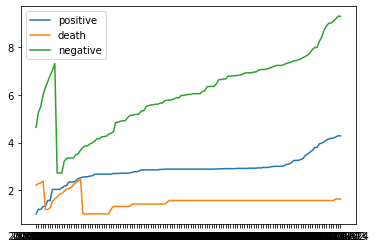

VT :


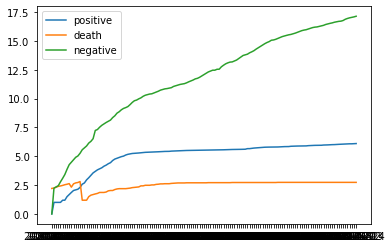

WA :


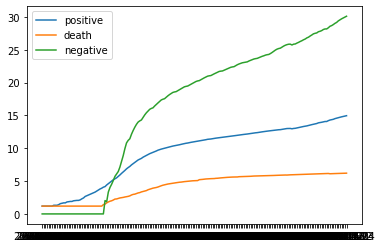

WI :


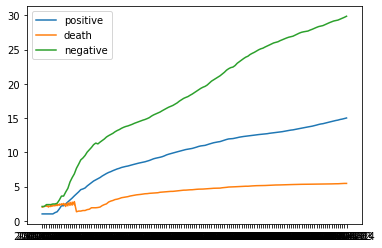

WV :


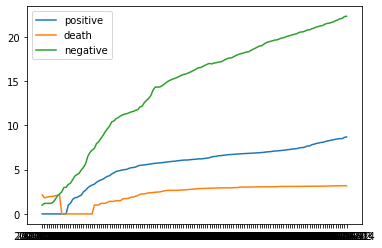

WY :


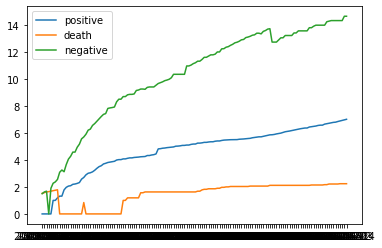

In [72]:
for d in x:
    dfd1=df_copy[df_copy["state"]==d]
    print(d,":")
    plt.plot(dfd1["date"],dfd1["positive"])
    plt.plot(dfd1["date"],dfd1["death"])
    plt.plot(dfd1["date"],dfd1["negative"])
    plt.legend(["positive", "death","negative"], loc ="upper left")
    plt.show()

In [73]:
from fbprophet import Prophet

In [74]:
# pip install --upgrade plotly

In [75]:
confirmed = df_copy.groupby('date').sum()['positive'].reset_index()
deaths = df_copy.groupby('date').sum()['death'].reset_index()
negative = df_copy.groupby('date').sum()['negative'].reset_index()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\KARTHIK\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


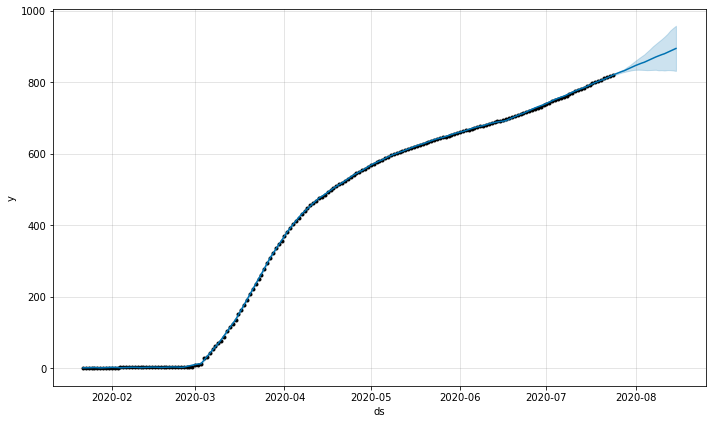

In [80]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
m = Prophet(interval_width=0.9) 
m.fit(confirmed) 
future = m.make_future_dataframe(periods=22) 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
confirmed_forecast_plot = m.plot(forecast)

In [ ]:
# for d in x:
#     dfd1=df_copy[df_copy["state"]==d]
#     print(d,":")
#     plt.plot(dfd1["date"],dfd1["positive"])
#     plt.plot(dfd1["date"],dfd1["death"])
#     plt.plot(dfd1["date"],dfd1["negative"])
#     plt.legend(["positive", "death","negative"], loc ="upper left")
#     plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\KARTHIK\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


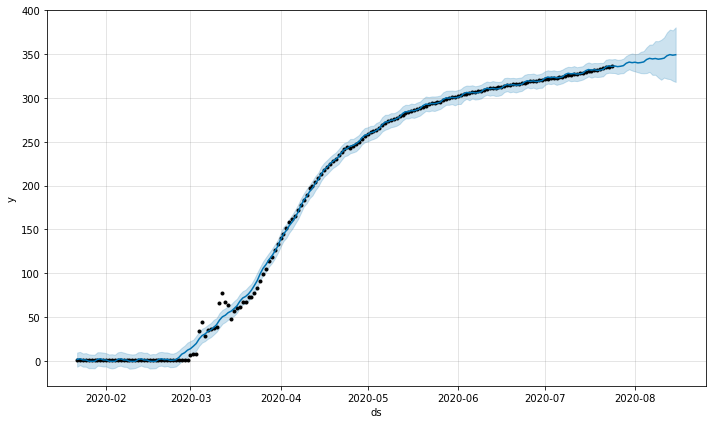

In [82]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=22)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
deaths_forecast_plot = m.plot(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\KARTHIK\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


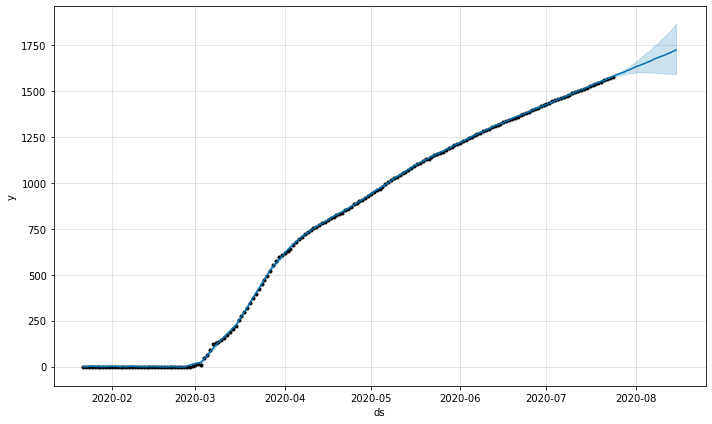

In [83]:
negative.columns = ['ds','y']
negative['ds'] = pd.to_datetime(negative['ds'])
m = Prophet(interval_width=0.95)
m.fit(negative)
future = m.make_future_dataframe(periods=22)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
negative_forecast_plot = m.plot(forecast)

In [ ]:
\]=